# 1.ETL

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as ss

In [120]:
df = pd.read_excel('dataset.xlsx')

In [87]:
df.head()

,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
0,7123812,D434244A,HW/SW,LAD - SMB BDCs 1 - Divisional - ORCL Brazil,LAD_RRITA_OD,Melissa Perez,CUSTOMER-TDBNBY,BR,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Move and Modernize ISV Apps (ISV customer),LUANA.LIMA@ORACLE.COM,10,50,0.0,NaN,NE
1,5857987,13C24C3A,Unassigned,LAD TECH License Sales 2 - ORCL Brazil,LAD_YZALEWSK,Leah Anderson,CUSTOMER-EGCAEV,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Other OCI Workloads,YURI.ZALEWSKY@ORACLE.COM,50,30,0.0,NaN,WEAK
2,5211345,DDA2C23C,HW/SW,FBGBU HW OD Others - ORCL Colombia,LAD_CAMIRODR,Jason Jordan,CUSTOMER-DVETKS,MX,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,OBSOLETE - HA/DR for Business Continuity,SANTIAGO.LOZANO@ORACLE.COM,10,12,0.0,NaN,NE
3,2227960,422BC2CD,HW/SW,GSO - Sales Central Operations - ORCL Scotland...,LAD_RICALOPE,Rebekah Munoz,CUSTOMER-GSASVP,MX,Unspecified,Won,...,License,On-Premise Technology,License - Database,Database,CRISTIANE.PESSOA@ORACLE.COM,100,64.3,64.3,NaN,WEAK
4,963452,34CC31DD,Unassigned,GSO - Sales Central Operations - ORCL Scotland...,LAD_DALZATE_,Adam Anderson,CUSTOMER-SIDXEE,CO,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,ELIANA.G.GONZALEZ@ORACLE.COM,30,400,0.0,NaN,NE


In [88]:
print(f'Las columnas a trabajar son: {df.columns}')
print(f'El tamaño del dataset es: {df.shape}')

Las columnas a trabajar son: Index(['revenue*-/Line Id', 'Opportunity*Id', 'Line*Of*Business*Code',
       'organization   name', 'Territory*Name', 'Opportunity*Owner*Email',
       'Customer****Name', 'Country', 'All*Competitors', 'Forecast*Type*Group',
       'opportunity*--status', 'Oppty*Created*Date', 'Pipeline*K',
       'Opportunity*Close*Date', 'Fiscal*Quarter', 'Reason*Won*Lost',
       'Revenue*Line*Status', 'Opty*Forecast*Type', 'Revenue*Type*Group',
       'Industry*Name', 'Competitor', 'Revenue*Line*Creation*Date',
       'Executive*Product*Lob', 'Executive*Product*Class',
       'Executive*Product*Pillar', 'Executive*Product*Line',
       'Revenue*Line*Created*By', 'Revenue*Line*Probability',
       'Best*Case**Pipeline*K', 'Worst*Case**Pipeline*K', 'Campaign*Type',
       'Deal*Qualification'],
      dtype='object')
El tamaño del dataset es: (3955, 32)


In [128]:
df.describe()

,revenue*-/Line Id,Pipeline*K,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K
count,3.955000e+03,3955.000000,3955.000000,3.955000e+03,3955.000000
mean,4.987965e+06,58.224039,40.257901,1.844211e+06,8.532441
std,2.899852e+06,150.558527,31.169811,1.151392e+08,84.134562
min,5.990000e+02,0.000000,10.000000,0.000000e+00,0.000000
25%,2.475241e+06,5.000000,10.000000,8.000000e+00,0.000000
50%,4.944165e+06,20.000000,30.000000,2.500000e+01,0.000000
75%,7.466541e+06,50.000000,50.000000,8.000000e+01,0.000000
max,9.999609e+06,3870.000000,100.000000,7.240927e+09,4383.515000


## Datos nulos

In [121]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

organization   name     792
Campaign*Type          3955
Deal*Qualification      452
dtype: int64

Las columnas que presentan valores Nulos, son de tipo string por lo que no es necesario eliminarlas, se reemplaza los valores nulos por "No fill"

In [122]:
df.fillna('No fill', inplace=True)

In [123]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [127]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue*-/Line Id           3955 non-null   int64  
 1   Opportunity*Id              3955 non-null   object 
 2   Line*Of*Business*Code       3955 non-null   object 
 3   organization   name         3955 non-null   object 
 4   Territory*Name              3955 non-null   object 
 5   Opportunity*Owner*Email     3955 non-null   object 
 6   Customer****Name            3955 non-null   object 
 7   Country                     3955 non-null   object 
 8   All*Competitors             3955 non-null   object 
 9   Forecast*Type*Group         3955 non-null   object 
 10  opportunity*--status        3955 non-null   object 
 11  Oppty*Created*Date          3955 non-null   object 
 12  Pipeline*K                  3955 non-null   float64
 13  Opportunity*Close*Date      3955 

## Corrección de tipo de variable segun descripción

Se hace uso y se identifica que variables deben ser de tipo numerico

In [125]:
columnas_numericas = ['Pipeline*K','Best*Case**Pipeline*K','Worst*Case**Pipeline*K']
df[columnas_numericas] = df[columnas_numericas].replace({',':''}, regex=True)
for i in columnas_numericas:
    df[i]=pd.to_numeric(df[i])


In [94]:
df.head()

,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
0,7123812,D434244A,HW/SW,LAD - SMB BDCs 1 - Divisional - ORCL Brazil,LAD_RRITA_OD,Melissa Perez,CUSTOMER-TDBNBY,BR,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Move and Modernize ISV Apps (ISV customer),LUANA.LIMA@ORACLE.COM,10,50,0.0,No fill,NE
1,5857987,13C24C3A,Unassigned,LAD TECH License Sales 2 - ORCL Brazil,LAD_YZALEWSK,Leah Anderson,CUSTOMER-EGCAEV,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Other OCI Workloads,YURI.ZALEWSKY@ORACLE.COM,50,30,0.0,No fill,WEAK
2,5211345,DDA2C23C,HW/SW,FBGBU HW OD Others - ORCL Colombia,LAD_CAMIRODR,Jason Jordan,CUSTOMER-DVETKS,MX,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,OBSOLETE - HA/DR for Business Continuity,SANTIAGO.LOZANO@ORACLE.COM,10,12,0.0,No fill,NE
3,2227960,422BC2CD,HW/SW,GSO - Sales Central Operations - ORCL Scotland...,LAD_RICALOPE,Rebekah Munoz,CUSTOMER-GSASVP,MX,Unspecified,Won,...,License,On-Premise Technology,License - Database,Database,CRISTIANE.PESSOA@ORACLE.COM,100,64.3,64.3,No fill,WEAK
4,963452,34CC31DD,Unassigned,GSO - Sales Central Operations - ORCL Scotland...,LAD_DALZATE_,Adam Anderson,CUSTOMER-SIDXEE,CO,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,ELIANA.G.GONZALEZ@ORACLE.COM,30,400,0.0,No fill,NE


In [95]:
no_name = df['organization   name'] == 'No fill'
df_organization_no_name = df[no_name]

In [96]:
print(f'El total de registros que no cuentan con nombre de la empresa son {df_organization_no_name.shape}')
df_organization_no_name.head()

El total de registros que no cuentan con nombre de la empresa son (792, 32)


,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
5,584631,32CB44D1,HW/SW,No fill,LAD_ARBORGES,Mary Harvey,CUSTOMER-PFZRFM,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-OIH-SPM_WW@ORACLE.COM,40,"1.,98404935670755",0.000000,No fill,No fill
8,5129333,D1D1CABC,HW/SW,No fill,LAD_EDELAV_T,Marc Lopez,CUSTOMER-WFKIZM,BR,Unspecified,Won,...,Cloud Infrastructure,PaaS,PaaS - Integration,PaaS - Integration,FUSION-CRM-CUST_WW@ORACLE.COM,100,8.624488,8.624488,No fill,WEAK
10,3857731,2431CDD3,Unassigned,No fill,LAD_RAMFRANC,Jessica Harris,CUSTOMER-SZQKJR,MX,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-CUST_WW@ORACLE.COM,50,12.089817,0.000000,No fill,WEAK
25,2280134,132341DC,HW/SW,No fill,LAD_DFOREROC,Mary Harvey,CUSTOMER-MZTEHW,MX,Unspecified,Won,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-OIH-SPM_WW@ORACLE.COM,100,15.022082,0.000000,No fill,No fill
36,3084231,422DBAB2,Unassigned,No fill,LAD_GNORTHCO,Christopher Haynes,CUSTOMER-UFXLJX,Peru,Unspecified,Won,...,Cloud Applications,Strategic Applications,Strategic Back Office,Fusion ERPM,FUSION-CRM-CUST_WW@ORACLE.COM,100,0,0.000000,No fill,No fill


In [97]:
df_organization_no_name['Opportunity*Owner*Email'].value_counts()

Mary Harvey       333
Alex Thomas         8
William Reid        7
Stacey Mathews      6
Robert Turner       6
                 ... 
Jared Valdez        1
Belinda White       1
Allen Owen          1
Tiffany Butler      1
Andrew Torres       1
Name: Opportunity*Owner*Email, Length: 315, dtype: int64

In [98]:
df['Opportunity*Owner*Email'].value_counts()

Mary Harvey          333
Christina Mcclure     15
Jay Mitchell          15
Michael Perez         14
Stacey Mathews        14
                    ... 
Michael Smith          1
Alexis Phillips        1
Jenny Rogers           1
Eric Cobb              1
Jason Bennett          1
Name: Opportunity*Owner*Email, Length: 1195, dtype: int64

In [99]:
no_dealq = df['Deal*Qualification'] == 'No fill'
df_no_dealq= df[no_dealq]

In [100]:
print(f'El total de registros que no cuentan con la calificacion de la propuesta son {df_no_dealq.shape}')
df_no_dealq.head()

El total de registros que no cuentan con la calificacion de la propuesta son (452, 32)


,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
5,584631,32CB44D1,HW/SW,No fill,LAD_ARBORGES,Mary Harvey,CUSTOMER-PFZRFM,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-OIH-SPM_WW@ORACLE.COM,40,"1.,98404935670755",0.000000,No fill,No fill
25,2280134,132341DC,HW/SW,No fill,LAD_DFOREROC,Mary Harvey,CUSTOMER-MZTEHW,MX,Unspecified,Won,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-OIH-SPM_WW@ORACLE.COM,100,15.022082,0.000000,No fill,No fill
36,3084231,422DBAB2,Unassigned,No fill,LAD_GNORTHCO,Christopher Haynes,CUSTOMER-UFXLJX,Peru,Unspecified,Won,...,Cloud Applications,Strategic Applications,Strategic Back Office,Fusion ERPM,FUSION-CRM-CUST_WW@ORACLE.COM,100,0,0.000000,No fill,No fill
42,2600504,1C344BCD,Unassigned,No fill,LAD_ANGEALVA,Mary Harvey,customer-wtqlwk,MX,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,FUSION-CRM-OIH-SPM_WW@ORACLE.COM,40,1290.327267,0.000000,No fill,No fill
50,3455642,322CA34A,Unassigned,LAD - SMB Tech Sales 1 - Divisional - ORCL Col...,LAD_JORGESAN,Christina Mcclure,customer-iyiesn,MX,Unspecified,Won,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Move and Modernize ISV Apps (ISV customer),JORGE.S.SANCHEZ@ORACLE.COM,100,30.224442,30.224442,No fill,No fill


In [101]:
df_no_dealq['Opportunity*Owner*Email'].value_counts()

Mary Harvey           286
Randall Meyer           4
Mary Walton             4
Melissa Green           3
Michelle Davis          3
                     ... 
Eric Newman             1
Tristan Nelson DDS      1
Zoe Hanna               1
Joshua Gutierrez        1
Andrew Torres           1
Name: Opportunity*Owner*Email, Length: 134, dtype: int64

## Ventas ganadas

In [102]:
df['Opty*Forecast*Type'].value_counts()

PIPELINE_10    1165
WON_100         652
UPSIDE_40       588
PIPELINE_30     562
PIPELINE_20     399
UPSIDE_50       260
FORECAST_60     254
FORECAST_70      38
FORECAST_80      22
FORECAST_90      15
Name: Opty*Forecast*Type, dtype: int64

## Revenue*Line*Status


<AxesSubplot:>

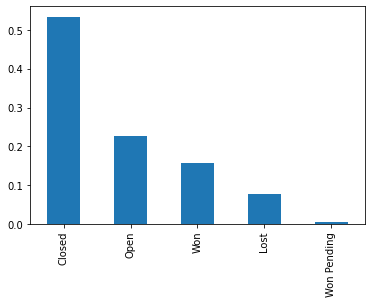

In [103]:
df['Revenue*Line*Status'].value_counts(normalize=True).plot.bar()

In [104]:
df['opportunity*--status'].value_counts()


Closed         2109
Open            917
Won             605
Lost            297
Won Pending      27
Name: opportunity*--status, dtype: int64

In [105]:
df['Revenue*Line*Status'].value_counts()

Closed         2111
Open            901
Won             621
Lost            303
Won Pending      19
Name: Revenue*Line*Status, dtype: int64

In [106]:
df[df['Revenue*Line*Probability'].duplicated(keep=False)]

,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
0,7123812,D434244A,HW/SW,LAD - SMB BDCs 1 - Divisional - ORCL Brazil,LAD_RRITA_OD,Melissa Perez,CUSTOMER-TDBNBY,BR,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Move and Modernize ISV Apps (ISV customer),LUANA.LIMA@ORACLE.COM,10,50,0.000000,No fill,NE
1,5857987,13C24C3A,Unassigned,LAD TECH License Sales 2 - ORCL Brazil,LAD_YZALEWSK,Leah Anderson,CUSTOMER-EGCAEV,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Other OCI Workloads,YURI.ZALEWSKY@ORACLE.COM,50,30,0.000000,No fill,WEAK
2,5211345,DDA2C23C,HW/SW,FBGBU HW OD Others - ORCL Colombia,LAD_CAMIRODR,Jason Jordan,CUSTOMER-DVETKS,MX,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,OBSOLETE - HA/DR for Business Continuity,SANTIAGO.LOZANO@ORACLE.COM,10,12,0.000000,No fill,NE
3,2227960,422BC2CD,HW/SW,GSO - Sales Central Operations - ORCL Scotland...,LAD_RICALOPE,Rebekah Munoz,CUSTOMER-GSASVP,MX,Unspecified,Won,...,License,On-Premise Technology,License - Database,Database,CRISTIANE.PESSOA@ORACLE.COM,100,64.3,64.300000,No fill,WEAK
4,963452,34CC31DD,Unassigned,GSO - Sales Central Operations - ORCL Scotland...,LAD_DALZATE_,Adam Anderson,CUSTOMER-SIDXEE,CO,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,ELIANA.G.GONZALEZ@ORACLE.COM,30,400,0.000000,No fill,NE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3950,8292040,4132B2AA,HW/SW,LAD Fin Services Enterprise SW Sales - ORCL Br...,LAD_LEPIMENT,Johnny Wells,CUSTOMER-ALFFWE,BR,Unspecified,Won,...,Cloud Applications,Strategic Applications,Strategic Marketing and Advertising,Marketing,FERNANDO.JAQUES@ORACLE.COM,100,78.97092,78.970920,No fill,NE
3951,7349716,2DBABB3B,GBU,LAD FBGBU Software Sales - ORCL Peru,LAD_EDARANDA,Kelsey Kaiser,CUSTOMER-DKJZZU,Peru,Unspecified,Won,...,Cloud Applications,Vertical Industry Solutions,Cloud Vertical,Food and Beverage Applications,EDUARDO.M.ARANDA@ORACLE.COM,100,0.849813,0.849813,No fill,WEAK
3952,1253766,4D2DBB11,HW/SW,LAD CX Sales Team 3 - ORCL Mexico,LAD_LILIAROD,Adam Baker,CUSTOMER-ZFVOBA,MX,Adobe**Other-In House Development,Upside,...,Cloud Applications,Strategic Applications,Strategic Marketing and Advertising,Marketing,FERNANDO.JAQUES@ORACLE.COM,50,110,0.000000,No fill,MODERATE
3953,3981087,32A4B1CA,HW/SW,LAD HCM Sales Team 1 - ORCL Chile,LAD_JEALBORN,Jason Bennett,CUSTOMER-YDHBPW,Chile,Other-Local,Pipeline,...,Cloud Applications,Strategic Applications,Strategic Back Office,Fusion HCM,RICARDO.PINO@ORACLE.COM,10,1,0.000000,No fill,NE


FORECAST_TYPE_GROUP:

In [107]:
df['Forecast*Type*Group'].value_counts(normalize=True)


Pipeline    0.537547
Upside      0.214412
Won         0.164855
Forecast    0.083186
Name: Forecast*Type*Group, dtype: float64

In [108]:
df['Reason*Won*Lost'].value_counts()

Closed - No Business Opportunity                       1050
Unassigned                                              948
Closed - Customer Not Ready or No Funding               599
Won - Primary reason was Oracle Relationship            295
Won - Primary reason was Oracle Product Features        212
Closed - Duplicate Opportunity                          143
Closed - Alternative Oracle Product                     131
Won - Primary reason was Oracle Pricing                  93
Lost - No Adoption                                       71
Lost - Competitor - Pricing & Policies                   71
Closed - Sales Rep Reject                                56
Closed - Operations Use Only                             54
Closed - Customer Acquired                               31
Lost - Alternative Oracle Solution - Other Cloud         30
Lost - Competitor - Product Feature / Functionality      28
Closed - System Termination                              22
Lost - Competitor - Relationship        

# Agrupar

In [109]:
df.groupby('Revenue*Line*Status')['opportunity*--status'].value_counts()

Revenue*Line*Status  opportunity*--status
Closed               Closed                  2108
                     Open                       3
Lost                 Lost                     297
                     Won                        4
                     Closed                     1
                     Won Pending                1
Open                 Open                     900
                     Won                        1
Won                  Won                      600
                     Open                      14
                     Won Pending                7
Won Pending          Won Pending               19
Name: opportunity*--status, dtype: int64

In [110]:
df.groupby('opportunity*--status')['Revenue*Line*Status'].value_counts().to_frame()

Revenue*Line*Status
opportunity*--status Revenue*Line*Status                     
Closed               Closed                              2108
                     Lost                                   1
Lost                 Lost                                 297
Open                 Open                                 900
                     Won                                   14
                     Closed                                 3
Won                  Won                                  600
                     Lost                                   4
                     Open                                   1
Won Pending          Won Pending                           19
                     Won                                    7
                     Lost                                   1

In [111]:
df.groupby('Revenue*Line*Status')['Opty*Forecast*Type'].value_counts().to_frame()

Opty*Forecast*Type
Revenue*Line*Status Opty*Forecast*Type                    
Closed              PIPELINE_10                        805
                    PIPELINE_30                        398
                    UPSIDE_40                          323
                    PIPELINE_20                        298
                    UPSIDE_50                          158
                    FORECAST_60                         87
                    FORECAST_70                         16
                    FORECAST_80                         11
                    FORECAST_90                          8
                    WON_100                              7
Lost                PIPELINE_10                         93
                    UPSIDE_40                           68
                    PIPELINE_30                         43
                    FORECAST_60                         33
                    UPSIDE_50                           28
                    PIPELINE_20                         21
                    FORECAST_70                          9
                    WON_100                              5
                    FORECAST_90                          2
                    FORECAST_80                          1
Open                PIPELINE_10                        267
                    UPSIDE_40                          196
                    FORECAST_60                        132
                    PIPELINE_30                        121
                    PIPELINE_20                         80
                    UPSIDE_50                           74
                    FORECAST_70                         13
                    FORECAST_80                          9
                    WON_100                              5
                    FORECAST_90                          4
Won                 WON_100                            616
                    FORECAST_60                          2
                    FORECAST_80                          1
                    FORECAST_90                          1
                    UPSIDE_40                            1
Won Pending         WON_100                             19

In [112]:
df.head()

,revenue*-/Line Id,Opportunity*Id,Line*Of*Business*Code,organization name,Territory*Name,Opportunity*Owner*Email,Customer****Name,Country,All*Competitors,Forecast*Type*Group,...,Executive*Product*Lob,Executive*Product*Class,Executive*Product*Pillar,Executive*Product*Line,Revenue*Line*Created*By,Revenue*Line*Probability,Best*Case**Pipeline*K,Worst*Case**Pipeline*K,Campaign*Type,Deal*Qualification
0,7123812,D434244A,HW/SW,LAD - SMB BDCs 1 - Divisional - ORCL Brazil,LAD_RRITA_OD,Melissa Perez,CUSTOMER-TDBNBY,BR,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Move and Modernize ISV Apps (ISV customer),LUANA.LIMA@ORACLE.COM,10,50,0.0,No fill,NE
1,5857987,13C24C3A,Unassigned,LAD TECH License Sales 2 - ORCL Brazil,LAD_YZALEWSK,Leah Anderson,CUSTOMER-EGCAEV,BR,Unspecified,Upside,...,Cloud Infrastructure,PaaS,Universal Credits Workload,Other OCI Workloads,YURI.ZALEWSKY@ORACLE.COM,50,30,0.0,No fill,WEAK
2,5211345,DDA2C23C,HW/SW,FBGBU HW OD Others - ORCL Colombia,LAD_CAMIRODR,Jason Jordan,CUSTOMER-DVETKS,MX,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits Workload,OBSOLETE - HA/DR for Business Continuity,SANTIAGO.LOZANO@ORACLE.COM,10,12,0.0,No fill,NE
3,2227960,422BC2CD,HW/SW,GSO - Sales Central Operations - ORCL Scotland...,LAD_RICALOPE,Rebekah Munoz,CUSTOMER-GSASVP,MX,Unspecified,Won,...,License,On-Premise Technology,License - Database,Database,CRISTIANE.PESSOA@ORACLE.COM,100,64.3,64.3,No fill,WEAK
4,963452,34CC31DD,Unassigned,GSO - Sales Central Operations - ORCL Scotland...,LAD_DALZATE_,Adam Anderson,CUSTOMER-SIDXEE,CO,Other-Local,Pipeline,...,Cloud Infrastructure,PaaS,Universal Credits,PaaS and IaaS Universal Credits,ELIANA.G.GONZALEZ@ORACLE.COM,30,400,0.0,No fill,NE


In [132]:
df['Pipeline*K'].value_counts()

0.000000      365
50.000000     212
20.000000     193
30.000000     161
10.000000     138
             ... 
148.793060      1
0.013610        1
8.316000        1
5.300000        1
0.849813        1
Name: Pipeline*K, Length: 1302, dtype: int64

KeyError: "None of [Index(['Pipeline*k'], dtype='object')] are in the [columns]"

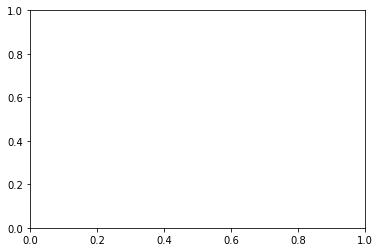

In [136]:
box=df.boxplot(column=['Pipeline*k'])

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3955 entries, 0 to 3954
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   revenue*-/Line Id           3955 non-null   int64  
 1   Opportunity*Id              3955 non-null   object 
 2   Line*Of*Business*Code       3955 non-null   object 
 3   organization   name         3955 non-null   object 
 4   Territory*Name              3955 non-null   object 
 5   Opportunity*Owner*Email     3955 non-null   object 
 6   Customer****Name            3955 non-null   object 
 7   Country                     3955 non-null   object 
 8   All*Competitors             3955 non-null   object 
 9   Forecast*Type*Group         3955 non-null   object 
 10  opportunity*--status        3955 non-null   object 
 11  Oppty*Created*Date          3955 non-null   object 
 12  Pipeline*K                  3955 non-null   float64
 13  Opportunity*Close*Date      3955 